<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/homeworks/hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# MAT281 - Tarea N°02


## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Alejandro Salas

* __Rol__: 202010504-9

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
   
4.- Esta Tarea debe ser entregada en **Dos Jupyter Notebooks Distinto**.
   * **Ejemplo**: `hw_02_part_01.ipynb`, `hw_02_part_02.ipynb`.

## II.- Titanic - Machine Learning from Disaster

<img src="https://i.pinimg.com/originals/8c/ef/e7/8cefe799c4d5d2ad4ad7f6524d3838f4.png" width = "400" align="center"/>


El desafío **Titanic - Machine Learning from Disaster** en [Kaggle](https://www.kaggle.com/competitions/titanic/overview/description) invita a predecir qué pasajeros sobrevivieron al naufragio del Titanic mediante un modelo de machine learning. Utiliza datos reales de los pasajeros, como su nombre, edad, género y clase socioeconómica, para explorar patrones de supervivencia y construir un modelo predictivo. Este es uno de los desafíos más populares de Kaggle y un excelente punto de partida para aprender sobre machine learning y análisis de datos.

### Pasos para participar:

1. **Unirse a la competencia**:
   - [Crea una cuenta o inicia sesión en Kaggle](https://www.kaggle.com/account/login?returnUrl=%2Fc%2Ftitanic) y acepta las reglas para acceder a los datos de la competencia.
   
2. **Descargar y explorar los datos**:
   - Descarga los archivos `train.csv` y `test.csv` desde la [página de datos](https://www.kaggle.com/competitions/titanic/data). 
   - `train.csv` contiene información de 891 pasajeros, incluyendo si sobrevivieron o no (columna `Survived`). En `test.csv`, se oculta esta columna para que tu modelo prediga la supervivencia de 418 pasajeros adicionales.

3. **Desarrollar el modelo**:
   - Usa `train.csv` para explorar y descubrir patrones, luego entrena un modelo de machine learning que pueda predecir la supervivencia en `test.csv`. Un recurso útil para aprender es el [tutorial de Alexis Cook](https://www.kaggle.com/alexisbcook/titanic-tutorial), que explica paso a paso cómo hacer tu primera predicción.
   - Puedes explorar notebooks de otros participantes para inspiración y técnicas avanzadas en la [sección de notebooks](https://www.kaggle.com/c/titanic/notebooks).

4. **Realizar una predicción y enviar tu archivo**:
   - El archivo CSV de predicciones debe tener dos columnas: `PassengerId` y `Survived`. Puedes consultar un ejemplo en el archivo `gender_submission.csv` disponible en la [página de datos](https://www.kaggle.com/competitions/titanic/data).
   - Sube tu archivo en la sección de envíos y revisa tu puntaje de precisión, que mide el porcentaje de pasajeros que tu modelo predijo correctamente.

5. **Revisar el leaderboard y mejorar el modelo**:
   - Ve tu posición en el [leaderboard](https://www.kaggle.com/c/titanic/leaderboard) y mejora tu modelo basándote en ideas de los foros o pruebas adicionales.

### Ayuda y recursos adicionales:

- [Foro de discusión del Titanic](https://www.kaggle.com/c/titanic/discussion): Un espacio donde puedes hacer preguntas y ver consejos de otros participantes.
- [Vídeo sobre la jerga de Kaggle](https://www.youtube.com/watch?v=sEJHyuWKd-s) por Dr. Rachael Tatman, para entender mejor los términos comunes en Kaggle.
- [Notebooks de la competencia](https://www.kaggle.com/c/titanic/notebooks): Revisa notebooks compartidos para ver cómo otros abordan el desafío.

Este desafío es ideal para principiantes en machine learning y permite practicar desde la limpieza de datos hasta el desarrollo y evaluación de modelos.

In [123]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#Leer Datos
df_train = pd.read_csv('titanic/train.csv')

## Integridad de los datos

In [124]:
df_train.isnull().sum()/df_train.shape[0] *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

En vista de que falta el 77% de los datos de la variable "Cabin" la dropearemos.
En edad falta alrededor del 20% de los datos, mientras ue en "Embarked" falta solo el 0,2%. Dropearemos las instancias en las que faltan datos de Embarked mientras que en Age rellenaremos con alguna medida estadística reelevante.

In [125]:
df_train = df_train.drop(columns=['Cabin'])
df_train = df_train.dropna(subset= ['Embarked'], how= 'any')



In [126]:
df_train['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Como la desviacion estandar es de alrededor de la mitad de la media, utilizaremos la mediana

In [127]:
df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())


In [128]:
#Verificar que se hayan hecho los cambiios y un vistazo a los datos
print(df_train.isnull().sum())
print(f'Hay {df_train.duplicated().sum()} elementos duplicados')
df_train.head(10)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Hay 0 elementos duplicados


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


Notemos que el nombre es inconsecuente con la probabilidad de que sobreviva una persona. El ID de ticket tambien. El sexo de la persona probablemente si entregue información, al igual que la edad, pues al momento de distribuir los botes de emergencia se priorizan a las mujeres y los niños, a la vez que los hombres pueden haber tenido facultades físicas que les permitan una mejor chance de supervivencia. El puerto de procedencia puede entregar información, pues que la diferencia en ambiente puede preparar personas de distinta forma para afrontar situaciones de crisis.
Con esto en mente, las columnas Nombre y ticket son dropeadas, la columna "Sex" es cambiada de "male" y "female" a "1" si es hombre y a "0" si es mujer (Esto con el fin de usar esta información para entrenar el modelo), y la columna "Embarked" es transformada de la forma S=0, C=1, Q=2. 

In [129]:
#Dropear
df_train = df_train.drop(columns=['Name', 'Ticket'])
df_train['Sex'] = df_train['Sex'].replace(['male','female'],[1,0])
df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0,1,2])

/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_8390/731350798.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace(['male','female'],[1,0])
/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_8390/731350798.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0,1,2])


In [130]:
print(df_train.head(10))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         0
1            2         1       1    0  38.0      1      0  71.2833         1
2            3         1       3    0  26.0      0      0   7.9250         0
3            4         1       1    0  35.0      1      0  53.1000         0
4            5         0       3    1  35.0      0      0   8.0500         0
5            6         0       3    1  28.0      0      0   8.4583         2
6            7         0       1    1  54.0      0      0  51.8625         0
7            8         0       3    1   2.0      3      1  21.0750         0
8            9         1       3    0  27.0      0      2  11.1333         0
9           10         1       2    0  14.0      1      0  30.0708         1


Ya con estos cambios, visualicemos las correlaciones de los datos

<Axes: >

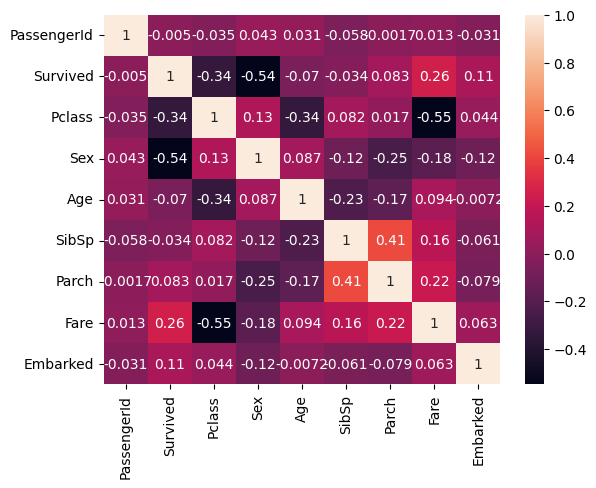

In [131]:
corr = df_train.corr()
sns.heatmap(corr, annot=True)

En la matriz de correlación no se logra apreciar ninguna correlación fuerte. La única variable que si podría estar un poco relacionada con la supervivencia es el sexo, donde aparentemente las mujeres sobreviven más que los hombres.
Intentemos hacer una visualizacion de las clases con pca en 2 dimensiones.

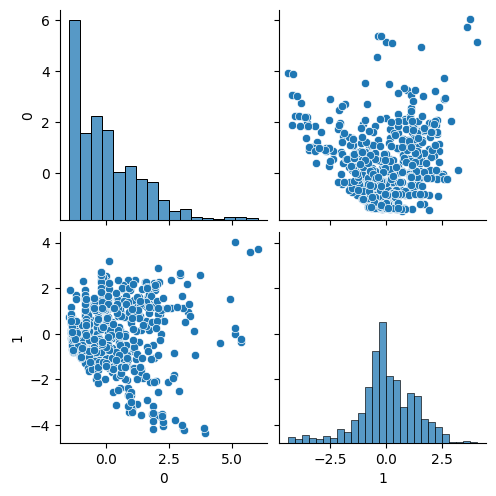

In [132]:
pca = PCA(n_components=2)
scaler = StandardScaler()
columns = df_train.columns.tolist()
columns.remove('Survived')
X = df_train[columns]
y = df_train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=23)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_PCA = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_val_PCA = pd.DataFrame(pca.transform(X_val_scaled))
sns.pairplot(X_train_PCA)

No se aprecian clases separables en dos dimensiones.

Ahora entrenemos modelos para predecir la supervivencia. Los datos no muestran gran correlación entre ellos, lo que indica que los modelos lineales deberían arrojar buenos resultados.

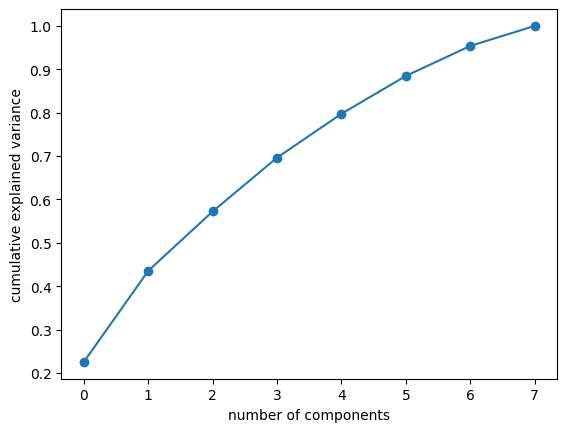

In [133]:
#Logistic Regresion
#Este modelo aprecia la reduccion de dimensionalidad. Para esto usaremos PCA
pca= PCA()
pca.fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker= 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Lamentablemente, para alcanzar una varianza alta se requiere mantener casi todas las componentes. Asi que mantendremos todas.

In [134]:
#Logistic Regression
LR = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10], 
    'solver': ['liblinear', 'lbfgs'], 
    'max_iter': [100, 200, 300],  
    'penalty': ['l2']  
}
grid_search = GridSearchCV(estimator=LR,param_grid=param_grid)
grid_search.fit(X_train_scaled,y_train)
best_params = grid_search.best_params_
#Entrenar el modelo con los mejores hiperpámetros
LR = LogisticRegression(penalty=best_params['penalty'], max_iter=best_params['max_iter'],solver=best_params['solver'],C=best_params['C']).fit(X_train_scaled,y_train)
pred_LR = LR.predict(X_val_scaled)
#Errores
print('LR')
print(f'f1: {f1_score(y_val, pred_LR)}')
print(f'accuracy: {accuracy_score(y_val, pred_LR)}')
print(f'Precision: {precision_score(y_val, pred_LR)}\n')
#SVM
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],  
    'coef0': [0, 0.1, 0.5],  
}
grid_search = GridSearchCV(estimator= svm, param_grid=param_grid)
grid_search.fit(X_train_scaled,y_train)
best_params=grid_search.best_params_
#Entrenar el modelo con los mejores hiperpámetros
svm=SVC(C=best_params['C'],kernel=best_params['kernel'],degree=best_params['degree'],gamma=best_params['gamma'],coef0=best_params['coef0'])
svm.fit(X_train_scaled,y_train)
pred_SVM = svm.predict(X_val_scaled)
print('SVM')
print(f'f1: {f1_score(y_val, pred_SVM)}')
print(f'accuracy: {accuracy_score(y_val, pred_SVM)}')
print(f'Precision: {precision_score(y_val, pred_SVM)}\n')

#DecisionTree
dtc = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
}
grid_search = GridSearchCV(estimator= dtc, param_grid=param_grid)
grid_search.fit(X_train_scaled,y_train)
best_params=grid_search.best_params_
dtc = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'],min_samples_leaf=best_params['min_samples_leaf'])
dtc.fit(X_train_scaled,y_train)
pred_dtc = dtc.predict(X_val_scaled)
print('dtc')
print(f'f1: {f1_score(y_val, pred_dtc)}')
print(f'accuracy: {accuracy_score(y_val, pred_dtc)}')
print(f'Precision: {precision_score(y_val, pred_dtc)}\n')



LR
f1: 0.6724137931034483
accuracy: 0.7865168539325843
Precision: 0.7358490566037735

SVM
f1: 0.6902654867256637
accuracy: 0.8033707865168539
Precision: 0.78

dtc
f1: 0.6610169491525424
accuracy: 0.7752808988764045
Precision: 0.7090909090909091



En terminos de f1 (Que suele ser la métrica más reelevante) gana SVM, que es, coincidentemente, el modelo que más demora en entrenar. Más allá de eso, gana en los scores en general tambien, por lo que usaremos SVM para el archivo de test

In [135]:
#Leer archivo de test
X_test = pd.read_csv('titanic/test.csv')
print(X_test.isna().sum())



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Rellenaremos 'Age' con la mediana y dropearemos las columnas que dropeamos al entrenar

In [136]:
X_test = X_test.drop(columns=['Name', 'Ticket','Cabin'])
X_test['Sex'] = X_test['Sex'].replace(['male','female'],[1,0])
X_test['Embarked'] = X_test['Embarked'].replace(['S','C','Q'], [0,1,2])
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())


/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_8390/1059040805.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Sex'] = X_test['Sex'].replace(['male','female'],[1,0])
/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_8390/1059040805.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Embarked'] = X_test['Embarked'].replace(['S','C','Q'], [0,1,2])


In [137]:
print(X_test.isna().sum())


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [141]:
X_test_standar = scaler.transform(X_test)
pred_test_svm = svm.predict(X_test_standar)
print(pred_test_svm)
print(X_test.index)
df_submit = pd.DataFrame()
df_submit['PassengerId'] = X_test['PassengerId']
df_submit['Survived'] = pred_test_svm.astype(int)
df_submit.set_index('PassengerId',drop=True,inplace=True)
print(df_submit)
df_submit.to_csv('submission_svm.csv')

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
RangeIndex(start=0, stop=418, step=1)
             Survived
PassengerId          
892                 0
893                 0
894                 0
895